In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

#**Assignment 3: Recurrent Neural Network**

## Data: Beijing PM2.5 Data Data Set

This hourly data set contains the PM2.5 data of US Embassy in Beijing.

Source: https://www.kaggle.com/datasets/djhavera/beijing-pm25-data-data-set

Q1. Please download this dataset from the assignemnt page and show the top five instances.

In [5]:
# Load the dataset
data = pd.read_csv('AirQuality.csv')
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Q2. Create a new column 'Date' by concatenating the year, month and day columns. Then, show the top five instances.

In [6]:
# Create 'Date' column
data['Date'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2) + '-' + data['day'].astype(str).str.zfill(2)
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01


Q3. Currently, this dataset has hourly values. Aggregate the dataset to become at the *day* lavel by getting the average values of *pm2.5, DEWP, TEMP, PRES, Iws, Is, Ir* (we do not need *No,	year,	month,	day,	hour, cbwd*). Then, show the top five instances.

*Hint*: You can use groupby for data aggregation.

In [7]:
# Aggregate the dataset
daily_data = data.groupby('Date').agg({
    'pm2.5': 'mean',
    'DEWP': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'Iws': 'mean',
    'Is': 'mean',
    'Ir': 'mean'
}).reset_index()
daily_data.head()

,Date,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,2010-01-01,NaN,-18.750000,-6.750000,1017.083333,14.458333,0.000000,0.0
1,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
3,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
4,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0


Q4. Rename the column names to the follwoing names (to make them more meaninful), and then, show the top five instances:
*Date,	Pollution,	Dew,	Temp,	Press,	Wind_spd,	Snow,	Rain*

In [8]:
# Rename columns
daily_data.columns = ['Date', 'Pollution', 'Dew', 'Temp', 'Press', 'Wind_spd', 'Snow', 'Rain']
daily_data.head()

,Date,Pollution,Dew,Temp,Press,Wind_spd,Snow,Rain
0,2010-01-01,NaN,-18.750000,-6.750000,1017.083333,14.458333,0.000000,0.0
1,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
3,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
4,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0


Q5. Change the type of the *Date* column to datetime, and then, show the data types.

In [9]:
# Change 'Date' column to datetime
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.dtypes

Date         datetime64[ns]
Pollution           float64
Dew                 float64
Temp                float64
Press               float64
Wind_spd            float64
Snow                float64
Rain                float64
dtype: object

Q6. Sort the dataset by *Date* and show the top five instances.

In [10]:
# Sort by 'Date'
daily_data = daily_data.sort_values(by='Date')
daily_data.head()

,Date,Pollution,Dew,Temp,Press,Wind_spd,Snow,Rain
0,2010-01-01,NaN,-18.750000,-6.750000,1017.083333,14.458333,0.000000,0.0
1,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
3,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
4,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0


Q7. Show the number of missing values per column.

In [11]:
# Show missing values
daily_data.isnull().sum()

Date          0
Pollution    37
Dew           0
Temp          0
Press         0
Wind_spd      0
Snow          0
Rain          0
dtype: int64

As you can see, the pollution value for a few data instances (i.e., 37) is null. For example, below, I have shown the data between Jan 20 to Jan 27 of 2010.

In [13]:
# Show data between Jan 20 to Jan 27 of 2010
mask = (daily_data['Date'] > '2010-01-20') & (daily_data['Date'] < '2010-01-27')
daily_data.loc[mask]

,Date,Pollution,Dew,Temp,Press,Wind_spd,Snow,Rain
20,2010-01-21,27.041667,-21.166667,-6.125000,1036.375000,59.070833,0.0,0.0
21,2010-01-22,29.416667,-18.791667,-4.583333,1034.375000,93.062083,0.0,0.0
22,2010-01-23,23.176471,-17.708333,-1.916667,1028.000000,43.892083,0.0,0.0
23,2010-01-24,NaN,-17.250000,-3.416667,1021.416667,31.695833,0.0,0.0
24,2010-01-25,NaN,-21.875000,-3.041667,1032.500000,146.202083,0.0,0.0
25,2010-01-26,195.583333,-15.375000,-5.666667,1024.708333,3.146667,0.0,0.0


Q8. For the missing polution values, please impute them by using the polution value from the day before. This method is called *forward* imputation. Please ignore/skip the first data instance on *2010-01-01*. Finally, show the data instances between Jan 20 to Jan 27 of 2010.

In [14]:
# Forward imputation
daily_data['Pollution'] = daily_data['Pollution'].fillna(method='ffill')
# Show data between Jan 20 to Jan 27 of 2010
mask = (daily_data['Date'] > '2010-01-20') & (daily_data['Date'] < '2010-01-27')
daily_data.loc[mask]

/var/folders/sp/86lyqnpx3hj4kmbg3ll3gyf80000gn/T/ipykernel_53172/1028417924.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_data['Pollution'] = daily_data['Pollution'].fillna(method='ffill')


,Date,Pollution,Dew,Temp,Press,Wind_spd,Snow,Rain
20,2010-01-21,27.041667,-21.166667,-6.125000,1036.375000,59.070833,0.0,0.0
21,2010-01-22,29.416667,-18.791667,-4.583333,1034.375000,93.062083,0.0,0.0
22,2010-01-23,23.176471,-17.708333,-1.916667,1028.000000,43.892083,0.0,0.0
23,2010-01-24,23.176471,-17.250000,-3.416667,1021.416667,31.695833,0.0,0.0
24,2010-01-25,23.176471,-21.875000,-3.041667,1032.500000,146.202083,0.0,0.0
25,2010-01-26,195.583333,-15.375000,-5.666667,1024.708333,3.146667,0.0,0.0


Q9. Print the total number of data instances.

In [15]:
# Print total number of data instances
print(len(daily_data))

1826


Q10. Drop the first data instance on *2010-01-01* and print the total number of data instances again.

In [16]:
# Drop first data instance
daily_data = daily_data[daily_data['Date'] != '2010-01-01']
# Print total number of data instances again
print(len(daily_data))

1825


Q11. Plot *Polution* versus *Date*. In this dataset pollution is measured according to *PM2.5 concentration (ug/m^3)*.

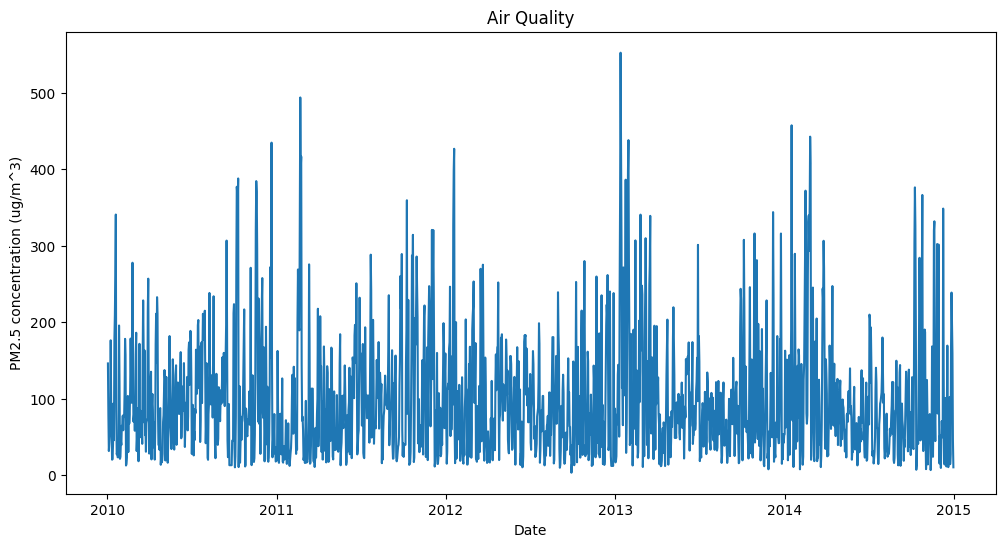

In [18]:
# Plot Pollution vs Date
pyplot.figure(figsize=(12,6))
pyplot.plot(daily_data['Date'], daily_data['Pollution'])
pyplot.xlabel('Date')
pyplot.ylabel('PM2.5 concentration (ug/m^3)')
pyplot.title('Air Quality')
pyplot.show()

Q12. Split the data to train and test, by considering the data instances before Jan 1st 2014 in the traning and other instnaces in the testing set. Print the size of your train and test data.

In [19]:
# Split data into train and test
train_data = daily_data[daily_data['Date'] < '2014-01-01']
test_data = daily_data[daily_data['Date'] >= '2014-01-01']
print(f'Train data size: {len(train_data)}')
print(f'Test data size: {len(test_data)}')

Train data size: 1460
Test data size: 365


## Scaling

Q13. Create x_train and x_test using *Pollution, Dew, Temp, Press,	Wind_spd,	Snow,	Rain*, and, y_train and y_test using *Pollution*. Then, scale the values using *MinMaxScaler* and show the top 10 data instances of x_train.

In [ ]:
# the below code is not correct

In [21]:
# Create x_train, x_test, y_train, y_test
from sklearn.preprocessing import MinMaxScaler
features = ['Pollution', 'Dew', 'Temp', 'Press', 'Wind_spd', 'Snow', 'Rain']
x_train = train_data[features].values
y_train = train_data['Pollution'].values
x_test = test_data[features].values
y_test = test_data['Pollution'].values
# Scale the values
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Show top 10 instances of x_train
x_train[:10]

array([[0.26022714, 0.35326087, 0.1971831 , 0.62141653, 0.05062437,
        0.05      , 0.        ],
       [0.13807507, 0.32298137, 0.125     , 0.58178752, 0.15042465,
        1.        , 0.        ],
       [0.05163598, 0.12267081, 0.0625    , 0.71332209, 0.23754358,
        0.        , 0.        ],
       [0.07188092, 0.05357143, 0.        , 0.8010118 , 0.12006321,
        0.        , 0.        ],
       [0.09728188, 0.06987578, 0.04049296, 0.80354132, 0.03687449,
        0.        , 0.        ],
       [0.12018066, 0.11568323, 0.04137324, 0.81028668, 0.01880726,
        0.        , 0.        ],
       [0.31527519, 0.19254658, 0.05809859, 0.68718381, 0.00105317,
        0.        , 0.        ],
       [0.15566618, 0.20729814, 0.11267606, 0.70826307, 0.02558382,
        0.        , 0.        ],
       [0.09879836, 0.21428571, 0.12059859, 0.77824621, 0.03450103,
        0.        , 0.        ],
       [0.03101192, 0.1257764 , 0.12147887, 0.8153457 , 0.08706749,
        0.        , 0. 

Q14. Show the top 10 data instances of y_train.

In [22]:
# Show top 10 instances of y_train (check with others)
y_train[:10]

array([145.95833333,  78.83333333,  31.33333333,  42.45833333,
        56.41666667,  69.        , 176.20833333,  88.5       ,
        57.25      ,  20.        ])

## Shifting

Q15. We want to use the past seven days of data to predict the pollution for a given day. Please shift the data accordingly, and print the shape of the **shifted** x_train.

In [23]:
# Shift the data
def create_shifted_data(x, y, n_days=7):
    X, Y = [], []
    for i in range(n_days, len(x)):
        X.append(x[i-n_days:i])
        Y.append(y[i])
    return np.array(X), np.array(Y)
x_train_shifted, y_train_shifted = create_shifted_data(x_train, y_train, n_days=7)
print(x_train_shifted.shape)

(1453, 7, 7)


Q16. Print the shape of y_train.

In [29]:
# Print shape of y_train
y_train_shifted = y_train_shifted.reshape(-1, 1)
print(y_train_shifted.shape)

(1453, 1)


Q17. Print the first data instance in the shifted x_train.

In [30]:
# Print first data instance in shifted x_train
print(x_train_shifted[0])

[[0.26022714 0.35326087 0.1971831  0.62141653 0.05062437 0.05
  0.        ]
 [0.13807507 0.32298137 0.125      0.58178752 0.15042465 1.
  0.        ]
 [0.05163598 0.12267081 0.0625     0.71332209 0.23754358 0.
  0.        ]
 [0.07188092 0.05357143 0.         0.8010118  0.12006321 0.
  0.        ]
 [0.09728188 0.06987578 0.04049296 0.80354132 0.03687449 0.
  0.        ]
 [0.12018066 0.11568323 0.04137324 0.81028668 0.01880726 0.
  0.        ]
 [0.31527519 0.19254658 0.05809859 0.68718381 0.00105317 0.
  0.        ]]


 Q18. Print the first data instance in the y_train.

In [34]:
# Print first data instance in y_train (check with others)
print(y_train_shifted[0])

[88.5]


# Model

Q19. Create an RNN prediction model with two GRU layers, one with 50 and one with 100 nodes.

In [36]:
# Create RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(x_train_shifted.shape[1], x_train_shifted.shape[2])))
model.add(GRU(100))
model.add(Dense(1))
model.summary()

/Users/nimeng/PycharmProjects/ISBA_2414/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 7, 50)          │         8,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 100)            │        45,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,551 (213.09 KB)

 Trainable params: 54,551 (213.09 KB)

 Non-trainable params: 0 (0.00 B)

Q20. Compile your RNN model with *adam* optimizer, *MSE* loss function and *MAE* as an extra metric. Please use the *batch size* of 16 with 10 *epochs*, and 10% *validation* split.

In [37]:
# Compile and train the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(x_train_shifted, y_train_shifted, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 13358.7178 - mae: 86.5829 - val_loss: 9969.1230 - val_mae: 71.2739
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11451.3311 - mae: 76.5209 - val_loss: 8863.4316 - val_mae: 64.9083
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10329.2246 - mae: 71.1660 - val_loss: 7972.1909 - val_mae: 60.0937
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9416.3428 - mae: 67.0165 - val_loss: 7262.9639 - val_mae: 56.4498
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8667.0928 - mae: 63.7089 - val_loss: 6688.4810 - val_mae: 53.8272
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8050.8677 - mae: 61.2644 - val_loss: 6242.9873 - val_mae: 52.0760
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7553.6533 - mae: 59.2999 - val_loss: 5887.1172 - val_mae: 51.1162
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7153.5151 - mae: 57.8656 - val_loss: 5609.8428 - val_mae: 50.7853
Epoch

## Performance

Q21. Show the performance on the test dataset.

In [38]:
# Prepare test data
x_test_shifted, y_test_shifted = create_shifted_data(x_test, y_test, n_days=7)
y_test_shifted = y_test_shifted.reshape(-1, 1)
# Evaluate the model
test_loss, test_mae = model.evaluate(x_test_shifted, y_test_shifted)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7279.5742 - mae: 56.7043 
Test Loss: 7279.57421875, Test MAE: 56.704315185546875


12/12 [==============================] - 1s 3ms/step


## Post-analysis

Q22. Plot the RNN model's predicted values on the training dataset as well as their actual values.

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


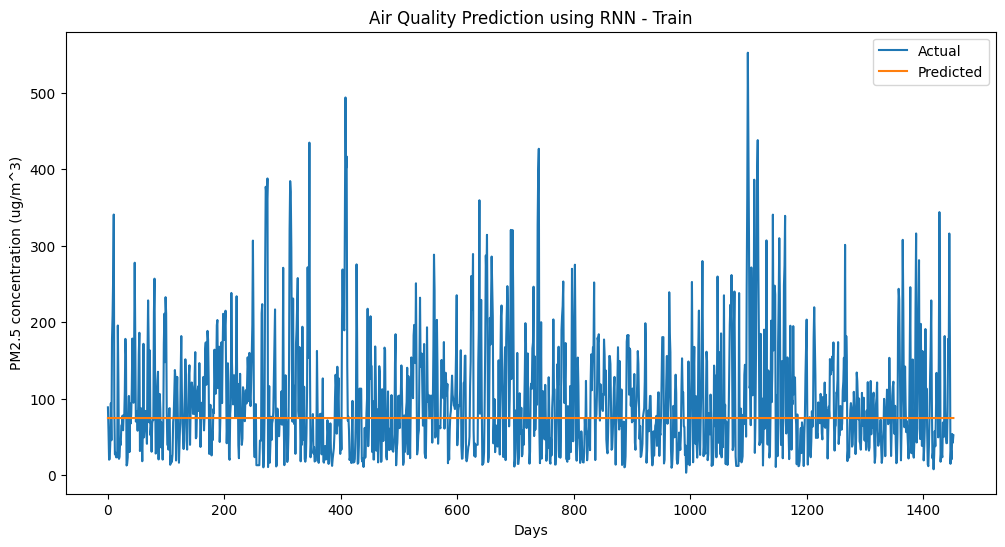

In [39]:
# Predict on training data
y_train_pred = model.predict(x_train_shifted)
# Plot actual vs predicted for training data
pyplot.figure(figsize=(12,6))
pyplot.plot(y_train_shifted, label='Actual')
pyplot.plot(y_train_pred, label='Predicted')
pyplot.xlabel('Days')
pyplot.ylabel('PM2.5 concentration (ug/m^3)')
pyplot.title('Air Quality Prediction using RNN - Train')
pyplot.legend()
pyplot.show()

Q23. Plot the RNN model's predicted values on the testing dataset as well as their actual values.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


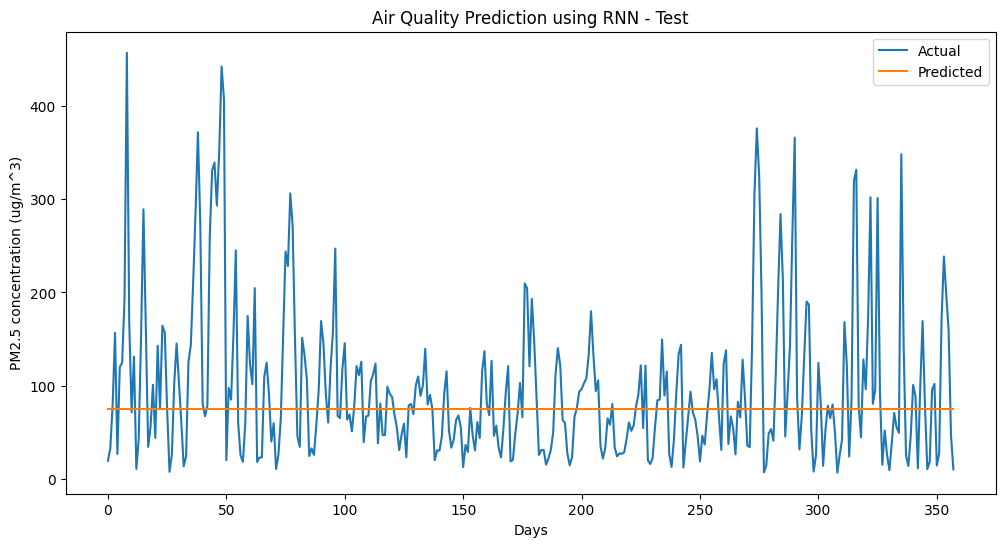

In [40]:
# Predict on testing data
y_test_pred = model.predict(x_test_shifted)
# Plot actual vs predicted for testing data
pyplot.figure(figsize=(12,6))
pyplot.plot(y_test_shifted, label='Actual')
pyplot.plot(y_test_pred, label='Predicted')
pyplot.xlabel('Days')
pyplot.ylabel('PM2.5 concentration (ug/m^3)')
pyplot.title('Air Quality Prediction using RNN - Test')
pyplot.legend()
pyplot.show()